# P467-2022 HW4

7 Feb, 2022
Abhishek Anil Deshmukh - 1811004


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from scipy.misc import derivative
%matplotlib inline

In [2]:
def stream_plot(f, x_range=(0, 10), y_range=(-5, 5), density=1, x_scale=20, xlabel="t(s)", ylabel="", title="", args=[]):
    def function(x):
        return f(x, *args)
    """makes and shows a stream plot for the given function with other beautification parameters"""
    u = np.ones(((x_range[1]-x_range[0])*10, (y_range[1]-y_range[0])*10)).T*x_scale
    v = function(np.repeat([np.arange(*y_range, 0.1)], 100, axis=0)).T
    plt.streamplot(*np.meshgrid(np.arange(*x_range, 0.1), np.arange(*y_range, 0.1)), u, v, density=density)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.show()

def vector_field(f, x_range, title="", xlabel="$x$", ylabel="$\dot{x}$", root_estimates=[-1, 1], args=[], arrows=[], fp=True):
    """makes and shows the vector field for the given function, with other beautification parameters"""
    # setup
    def function(x):
        return f(x, *args)
    x = np.linspace(*x_range, 100)

    # plotting the function
    plt.plot(x, function(x))

    if fp:
        # finding and classifying fixed point
        fixed_points = root(function, root_estimates, method="lm")["x"]
        fixed_points = set(fixed_points) # removes repetition
        stable = []
        unstable = []
        semi_stable = []
        for fixed_point in fixed_points:
            deri = derivative(function, fixed_point, dx=0.001)
            if deri > 0:
                unstable.append(fixed_point)
            elif deri < 0:
                stable.append(fixed_point)
            else:
                semi_stable.append(fixed_point)


        # drawing fixed points
        if len(stable) > 0:
            plt.scatter(stable, np.zeros(len(stable)), label=f"{len(stable)} stable fixed points")
            print(f"stable fixed points: {stable}")
        if len(unstable) > 0:
            plt.scatter(unstable, np.zeros(len(unstable)), label=f"{len(unstable)} unstable fixed points")
            print(f"unstable fixed points: {unstable}")
        if len(semi_stable) > 0:
            plt.scatter(semi_stable, np.zeros(len(semi_stable)), label=f"{len(semi_stable)} semi-stable fixed points")
            print(f"semi-stable fixed points: {semi_stable}")

    # drawing arrows
    for arrow in arrows:
        if function(arrow) > 0:
            plt.scatter([arrow], [0], marker=">", color="blue")
        elif function(arrow) < 0:
            plt.scatter([arrow], [0], marker="<", color="red")
        else:
            print(f"x={arrow} is a solution")

    # beautification stuff
    plt.axhline(y=0, xmin=x_range[0], xmax=x_range[1], color="black") # x-axis
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

def bifurcation_diagram(f, r_range, x_range, root_estimates, title="Bifurcation diagram", xlabel="r", ylabel="x*", args=[]):
    def function(x, r):
        return f(x, r, *args)
    stables_r = []
    stables_x = []
    unstables_r = []
    unstables_x = []

    for r in np.linspace(*r_range, 100):
        def fun(x):
            return function(x, r)
        # finding and classifying fixed point for that r
        fixed_points = root(fun, root_estimates, method="lm")["x"]
        fixed_points = set(fixed_points) # removes repetition
        stable = []
        unstable = []
        semi_stable = []
        for fixed_point in fixed_points:
            deri = derivative(fun, fixed_point, dx=0.01)
            if deri > 0:
                unstables_x.append(fixed_point)
                unstables_r.append(r)
            elif deri < 0:
                stables_x.append(fixed_point)
                stables_r.append(r)
            else:
                semi_stable.append(fixed_point)
    plt.scatter(stables_r, stables_x, label="stable", s=4)
    plt.scatter(unstables_r, unstables_x, label="unstable", s=4)
    plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

## 3.6.3


stable fixed points: [-0.3027756377319946]
unstable fixed points: [-3.1789591227065787e-22]


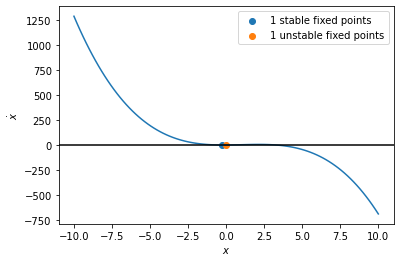

In [6]:
def q3_6_3(x, r, a):
    return r*x + a*x*x - x*x*x
vector_field(q3_6_3, [-10, 10], args=[1, 3])

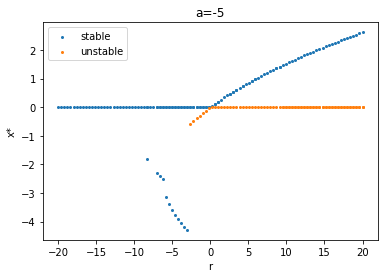

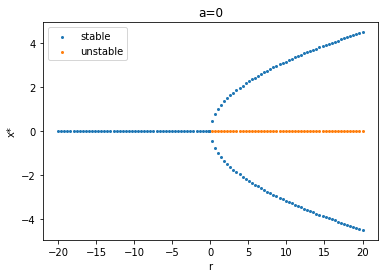

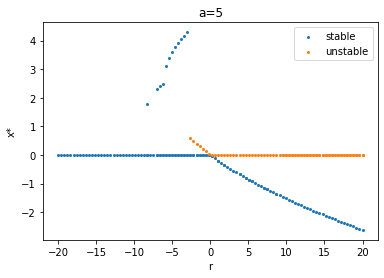

In [14]:
for a in [-5, 0, 5]:
    bifurcation_diagram(q3_6_3, [-20, 20], [10, 10], [-3, 0, 3], args=[a], title=f"a={a}")